In [195]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
data=pd.read_csv(r'C:\Users\BM\Downloads\iris.csv',index_col=0) #맨앞 id는 row_num으로

In [196]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [197]:
X = data.drop('Species', axis=1).to_numpy() #target인 종을 제외한 값들을 넘파이 배열로

In [198]:
scaler = MinMaxScaler() 
scaler.fit(X) 
X = scaler.transform(X)

In [199]:
X #확인

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [200]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
target=data['Species']

encoder = LabelEncoder()
encoder.fit(target)
Y_encoder=encoder.transform(target)

Y = np_utils.to_categorical(Y_encoder)
# 범주형 데이터로 나뉘어져 있는 Y값을 labelencoder를 통해 100 010 001 식의 넘파이 배열로 전처리

In [201]:
Y #확인

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [202]:
# scaler.fit(Y)
# Y = scaler.transform(Y) #1 0 0 , 0 1 0 , 0 0 1 이니까 스케일링 안해도 상관없다.

In [203]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

In [204]:
X_train[1]

array([0.16666667, 0.45833333, 0.08474576, 0.        ])

In [205]:
X_test[1]

array([0.25      , 0.29166667, 0.49152542, 0.54166667])

In [237]:
from keras import models
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

def build_model():
    model = models.Sequential()
    model.add(Dense(80, activation='relu', input_shape=(X_train.shape[1],))) #input layer
    model.add(Dense(40, activation='relu'))  #hidden layer
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax')) #마지막 output활성화함수에서는 softmax, 카테고리수만큼 outlayer dense 지정
    
    model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy']) #분류모델, loss fucntion은 cross entropy
    return model

In [238]:
model = build_model()
history = model.fit(X_train, Y_train, epochs=300, batch_size=32, verbose=2)

Epoch 1/300
3/3 - 0s - loss: 1.1634 - accuracy: 0.3333
Epoch 2/300
3/3 - 0s - loss: 1.1362 - accuracy: 0.3733
Epoch 3/300
3/3 - 0s - loss: 1.0997 - accuracy: 0.4400
Epoch 4/300
3/3 - 0s - loss: 1.0795 - accuracy: 0.5067
Epoch 5/300
3/3 - 0s - loss: 1.0565 - accuracy: 0.5467
Epoch 6/300
3/3 - 0s - loss: 1.0304 - accuracy: 0.6267
Epoch 7/300
3/3 - 0s - loss: 1.0057 - accuracy: 0.6267
Epoch 8/300
3/3 - 0s - loss: 0.9870 - accuracy: 0.6133
Epoch 9/300
3/3 - 0s - loss: 0.9676 - accuracy: 0.6800
Epoch 10/300
3/3 - 0s - loss: 0.9401 - accuracy: 0.6933
Epoch 11/300
3/3 - 0s - loss: 0.9287 - accuracy: 0.7067
Epoch 12/300
3/3 - 0s - loss: 0.8994 - accuracy: 0.7067
Epoch 13/300
3/3 - 0s - loss: 0.8609 - accuracy: 0.7200
Epoch 14/300
3/3 - 0s - loss: 0.8520 - accuracy: 0.7200
Epoch 15/300
3/3 - 0s - loss: 0.8309 - accuracy: 0.7067
Epoch 16/300
3/3 - 0s - loss: 0.7992 - accuracy: 0.7067
Epoch 17/300
3/3 - 0s - loss: 0.7833 - accuracy: 0.7067
Epoch 18/300
3/3 - 0s - loss: 0.7720 - accuracy: 0.7067
E

Epoch 147/300
3/3 - 0s - loss: 0.1674 - accuracy: 0.9200
Epoch 148/300
3/3 - 0s - loss: 0.1271 - accuracy: 0.9467
Epoch 149/300
3/3 - 0s - loss: 0.1255 - accuracy: 0.9600
Epoch 150/300
3/3 - 0s - loss: 0.1375 - accuracy: 0.9600
Epoch 151/300
3/3 - 0s - loss: 0.1258 - accuracy: 0.9733
Epoch 152/300
3/3 - 0s - loss: 0.1464 - accuracy: 0.9467
Epoch 153/300
3/3 - 0s - loss: 0.1201 - accuracy: 0.9867
Epoch 154/300
3/3 - 0s - loss: 0.1222 - accuracy: 0.9733
Epoch 155/300
3/3 - 0s - loss: 0.1144 - accuracy: 0.9733
Epoch 156/300
3/3 - 0s - loss: 0.1286 - accuracy: 0.9733
Epoch 157/300
3/3 - 0s - loss: 0.0841 - accuracy: 0.9867
Epoch 158/300
3/3 - 0s - loss: 0.1259 - accuracy: 0.9600
Epoch 159/300
3/3 - 0s - loss: 0.1040 - accuracy: 0.9867
Epoch 160/300
3/3 - 0s - loss: 0.1456 - accuracy: 0.9600
Epoch 161/300
3/3 - 0s - loss: 0.1039 - accuracy: 0.9867
Epoch 162/300
3/3 - 0s - loss: 0.0914 - accuracy: 0.9867
Epoch 163/300
3/3 - 0s - loss: 0.1066 - accuracy: 0.9733
Epoch 164/300
3/3 - 0s - loss: 

Epoch 291/300
3/3 - 0s - loss: 0.0439 - accuracy: 0.9867
Epoch 292/300
3/3 - 0s - loss: 0.0549 - accuracy: 0.9733
Epoch 293/300
3/3 - 0s - loss: 0.0568 - accuracy: 0.9867
Epoch 294/300
3/3 - 0s - loss: 0.0551 - accuracy: 0.9867
Epoch 295/300
3/3 - 0s - loss: 0.0521 - accuracy: 0.9867
Epoch 296/300
3/3 - 0s - loss: 0.0502 - accuracy: 0.9867
Epoch 297/300
3/3 - 0s - loss: 0.0406 - accuracy: 1.0000
Epoch 298/300
3/3 - 0s - loss: 0.0770 - accuracy: 0.9733
Epoch 299/300
3/3 - 0s - loss: 0.0550 - accuracy: 0.9867
Epoch 300/300
3/3 - 0s - loss: 0.0350 - accuracy: 1.0000


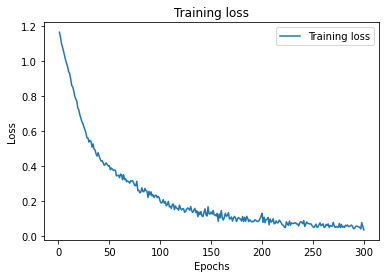

In [239]:
import matplotlib.pyplot as plt

loss = history.history['loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training loss')
plt.title("Training loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

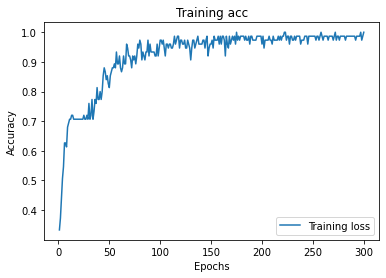

In [240]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label='Training loss')
plt.title("Training acc")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [241]:
print('\nloss: {:.4f}'.format(model.evaluate(X_test, Y_test)[0]))
print('\nAccuracy: {:.4f}'.format(model.evaluate(X_test, Y_test)[1]))

3/3 [==============================] - 0s 0s/step - loss: 0.0979 - accuracy: 0.9333

loss: 0.0979
3/3 [==============================] - 0s 997us/step - loss: 0.0979 - accuracy: 0.9333

Accuracy: 0.9333


In [214]:
# accuracy는 epoch 수가 많아짐에 따라 100%에 수렴하게되고 loss는 점점 줄어듦
# 또한 첫번째 input layer와 두번째 layer(hidden layer의) dense를 높이면 loss가 줄어드는 것 확인